<a href="https://colab.research.google.com/github/CarloGiorgio/Computational_Biolophysics/blob/main/Clustering/potts_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superparamagnetic clustering
We implement a clustering method based on the Potts model 

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import euclidean_distances

In [267]:
x,label=load_iris(True)
print(x.shape,label.shape)

(150, 4) (150,)


In [269]:
#Distances between the elements 
#Element i-j: distance between the element i and j
dist=euclidean_distances(x)
dist

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

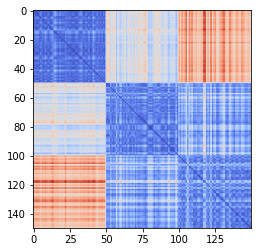

In [270]:
plt.imshow(dist,'coolwarm')

In [451]:
#Set the number of neighbors and the list of the closed ones
# np.argsort create an array of the argument with lower value of the distances

K=7
N=dist.shape[0]
nodenext=[]
Rank=np.argsort((dist))[:,1:K+1]
for i in range(N):
        e=[]
        for j in Rank[i]:
            if i in Rank[j]:
                e.append(j)
        nodenext.append(e.copy())
nodenext
del(Rank,e)

print(len(nodenext))

150


In [452]:
nodenext

[[17, 4, 28, 39, 27, 40, 7],
 [12, 45, 34, 9, 25, 35],
 [47, 3, 6, 12, 45, 42],
 [47, 29, 30, 2, 12, 45, 38],
 [0, 37, 40, 17, 7, 39, 27],
 [18, 10, 44, 16],
 [47, 2, 11, 42],
 [39, 49, 0, 17, 28, 4, 11],
 [38, 42, 13],
 [34, 1, 30, 12, 25, 45, 29],
 [48, 36, 19, 46, 16, 5],
 [7, 29, 26, 6, 24],
 [1, 9, 34, 45, 30, 2, 3],
 [38, 42, 8],
 [33, 15],
 [33, 14],
 [10, 33, 5, 32],
 [0, 40, 28, 4, 39, 27, 7],
 [5, 33],
 [46, 21, 48, 10],
 [31, 36],
 [19, 46, 48],
 [],
 [26, 43],
 [11],
 [34, 9, 30, 1],
 [23, 43, 11],
 [28, 39, 0, 17, 48, 4],
 [27, 0, 39, 17, 7, 49, 40],
 [30, 3, 47, 11, 9],
 [34, 29, 9, 25, 3, 12, 45],
 [20, 36],
 [33, 46, 16],
 [32, 15, 16, 14, 18],
 [9, 1, 30, 25, 12, 45],
 [49, 1],
 [10, 31, 20],
 [4],
 [8, 42, 13, 3],
 [7, 27, 0, 28, 49, 17, 4],
 [17, 0, 4, 49, 28],
 [],
 [38, 47, 2, 13, 6, 8],
 [26, 23],
 [5],
 [1, 12, 34, 30, 2, 3, 9],
 [19, 21, 48, 10, 32],
 [2, 3, 6, 29, 42],
 [10, 27, 19, 46, 21],
 [7, 39, 35, 28, 40],
 [52, 86, 65, 76],
 [56, 75, 65, 91, 74, 54],
 [

In [453]:
# Evaluation of the parameter of the Hamiltonian 
#The mean value of the closed ones and the average nearest neighbors distance

khat = 0
for i in nodenext:
    khat+= len(i)
khat = khat / N


a = 0
for i in range(N):
    a+=sum(dist[i,nodenext[i]])
a = 4 * a / (khat*N)

J = (1 / khat) * np.exp(- ( dist / a/2)**2)
J.shape

(150, 150)

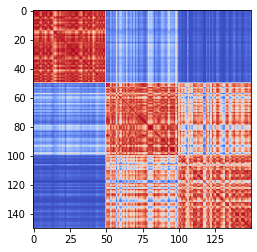

In [454]:
plt.imshow(J,'coolwarm')

(array([0.20374251, 0.30235187, 0.16196526, 0.13549378, 0.17313095,
        0.18254024, 0.13235735, 0.07728164, 0.03349707, 0.00903292]),
 array([0.        , 0.70851958, 1.41703917, 2.12555875, 2.83407833,
        3.54259792, 4.2511175 , 4.95963708, 5.66815667, 6.37667625,
        7.08519583]),
 <a list of 10 Patch objects>)

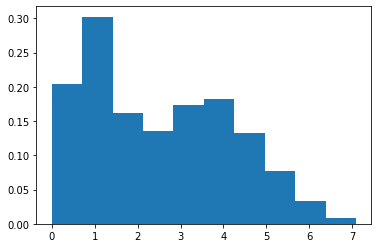

In [455]:
plt.hist(dist.reshape(N*N),density=True)

In [456]:
#Assignment of the spins in a random way 
#In the paper they used 20 potts spin

sp=np.random.randint(20,size=N)
sp

array([10, 17,  3,  8,  0,  3, 14, 10,  0,  6, 18, 18,  6,  1, 14, 13,  2,
       19, 17, 18,  3,  4,  9, 10,  3,  1,  7, 12, 18,  8,  1, 18, 17, 10,
        0, 18, 16, 10,  7, 13, 18, 13,  4, 10, 15,  3,  0, 10,  1, 17, 19,
       16, 18,  1,  9,  2,  4, 18, 14, 17, 14,  5,  5, 10,  7, 14, 16,  4,
       10,  4,  2, 11, 15,  9,  8, 17,  5, 10, 18, 10,  2, 10, 12, 11,  3,
        7,  1,  5,  1, 13, 12,  6, 14,  0, 15, 15, 12,  6, 16,  8, 10,  2,
        3,  9, 14, 17,  0,  1,  9, 17, 17,  2, 17, 18,  3,  1,  4,  8,  6,
        0, 13, 13, 17, 12,  0,  6, 16, 12,  6, 17, 16, 19,  5, 14, 15, 16,
        5, 17,  6,  0,  5,  8, 11,  2,  2,  4,  3, 12, 16,  0])

In [457]:
#Creation of the cluster list
"""
For the creation of the cluster we will create a list with all the elemnts.
In recurrent way we will upgrade the list untill all the elements are 
in one cluster.

"""
def new_advance(i,i_c,nei,sp,J,T):
  l=[]
  if nei[i]:
    for n in nei[i]:
      if i_c[n]==0 and sp[i]==sp[n] and np.random.random()>np.exp(-2*J[i,n]/T):
        l.append(n)
        i_c[n]=i_c[i]
  if l:
    for l_n in l:
      new_advance(l_n,i_c,nei,sp,J,T)

def create_cluster(T,nei,N,sp,J):
  i_c=np.zeros(N)
  i=0
  k=0
  while True:
    while i_c[i]!=0:
      i+=1
    k+=1
    i_c[i]=k
    new_advance(i,i_c,nei,sp,J,T)
    if np.all(i_c!=0):
      break

  cl=[]
  g=np.arange(N)
  for k in np.unique(i_c):
    cl.append(list(g[i_c==k].copy()))

  return cl.copy()

In [458]:
sp=np.ones(N)
cl=create_cluster(1e-10,nodenext,N,sp,J)
cl

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [22],
 [41],
 [50,
  51,
  52,
  53,
  54,
  55,
  56,
  58,
  59,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  94,
  95,
  96,
  97,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  107,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149],
 [57, 60, 93, 98],
 [106],
 [108],
 [134]]

In [459]:
#Magnetization
def mag_pot(S,q):
    n_m=np.amax(np.bincount(S))
    return (n_m/N*q-1)/(q-1)

In [460]:
def energy(sp,J):
  E=0
  for i in range(N):
    for j in nodenext[i]:
      if sp[i]==sp[j]:
        E -= 0.5*J[i, j]
  return E/N

In [461]:
q=20.
sp=np.ones(N,int)#np.random.randint(int(q),size=N)

spc=sp.copy()
tem=0
m=[]
Te=1000
e=energy(sp,J)
T=0.1
for t in range(Te):
    cl=create_cluster(T,nodenext.copy(),N,sp,J)

    r=np.random.randint(len(cl))
    spc[cl[r]]=np.random.randint(q)
    ep=energy(spc,J)

    if e>ep or np.random.random()<np.exp(-(ep-e)/T):
      sp=spc.copy()
    else:
      spc=sp.copy()

    if t>300:
      tem=mag_pot(sp,q)
      m.append(tem)
      #m_2+=tem**2

    if False:
      plt.imshow(sp.reshape(10,15))
      plt.pause(0.05)
      plt.clf()

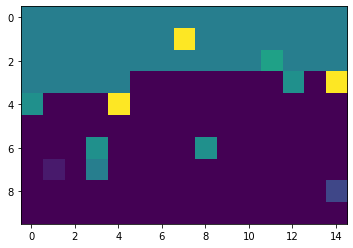

In [462]:
#sp.reshape(-1)
sp=sp.reshape(10,15)
plt.imshow(sp)



 0.61 7.6e-03


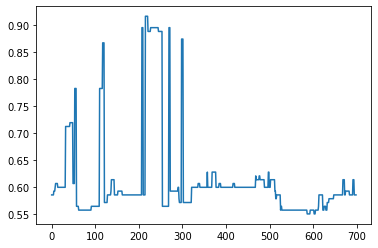

In [463]:
m=np.asarray(m)
plt.plot(m)

print('\n\n %0.2lf %0.1e'%(m.mean(),m.var()))

In [464]:
def simu_pot(T,Te=400,q=20.):
    sp=np.random.randint(q)*np.ones(N,int) #np.random.randint(int(q),size=N)
    e=energy(sp,J)
    em=0
    tem=0
    m=0
    m_2=0
    ts=100
    spc=sp.copy()

    for t in range(Te):
        cl=create_cluster(T,nodenext,N,sp,J)

        r=np.random.randint(len(cl))

        spc[cl[r]]=np.random.randint(q)
        ep=energy(spc,J)

        if e>ep or np.random.random()<np.exp(-(ep-e)/T):
          sp=spc.copy()
          e=ep
        
        else:
          spc=sp.copy()

        if t>ts:
          em+=e
          tem=mag_pot(sp,q)
          m+=tem/(Te-ts)
          m_2+=tem**2/(Te-ts)

    return m,m_2-m**2,em

In [520]:
Tem=np.linspace(0.001,1.,50)

results=[]
for T in Tem:
    results.append(simu_pot(T,800,14.))
results=np.asarray(results)

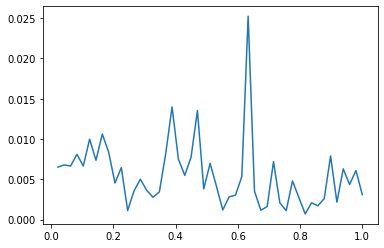

In [521]:
#fig,ax=plt.subplots(2,1)
plt.plot(Tem[1:],results[1:,1])
#plt.xscale('log')
#plt.yscale('log')
#ax[1].plot(Tem,results[:,0],'.')
#ax[0].set_yscale('log')

In [481]:
print(results[2,1],results[18,1])

0.01961397942387272 0.013269347812834648


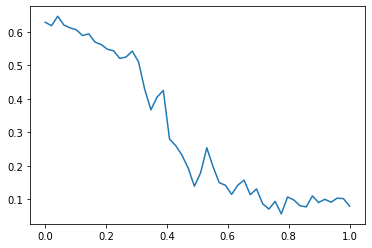

In [469]:
plt.plot(Tem,results[:,0])

In [429]:
print(results[12,0],results[30,0])

0.40243055555555424 0.117402777777778


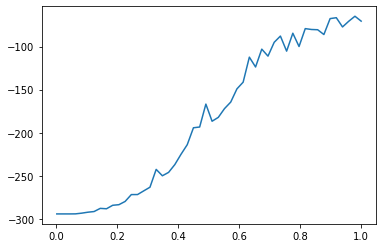

In [470]:
plt.plot(Tem,results[:,2])

In [501]:
T=(Tem[3]+Tem[17])*0.5
q=10
sp=np.random.randint(q)*np.ones(N,int) #np.random.randint(int(q),size=N)
e=energy(sp,J)
em=0
tem=0
m=0
m_2=0
ts=100
spc=sp.copy()
G=np.zeros((N,N))
Te=1000
for t in range(Te):
    cl=create_cluster(T,nodenext,N,sp,J)

    r=np.random.randint(len(cl))

    spc[cl[r]]=np.random.randint(q)
    ep=energy(spc,J)

    if e>ep or np.random.random()<np.exp(-(ep-e)/T):
      sp=spc.copy()
      e=ep
    
    else:
      spc=sp.copy()

    if t>ts:
      for i in range(N):
        for j in range(N):
          if sp[i]==sp[j]:
            G[i,j]+=1./(Te-ts)

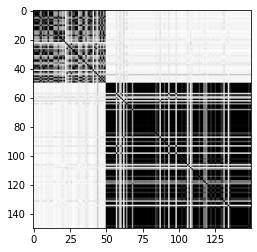

In [502]:
plt.imshow(G,'binary')

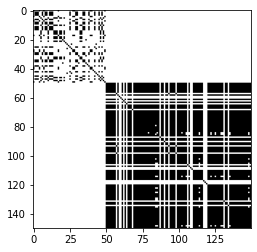

In [516]:
def g_s(G,theta):
  G_c=G.copy()
  G_c[G_c>theta]=1
  G_c[G_c<theta]=0
  return G_c
G_c=G.copy()
G_c=g_s(G,0.75)
plt.imshow(G_c,'binary')

In [496]:
def advance(i,nei,i_c,G):
  l=[]
  for n in nei:
    if i_c[n]==0 and G[i,n]==1:
      l.append(n)
      i_c[n]=i_c[i]
  if l:
    for l_n in l:
      advance(l_n,nei,i_c,G)


In [517]:
i_c=np.zeros(N)
i=0
k=0
n_i=list(range(N))
while True:
  while i_c[i]!=0:
    i+=1
  k+=1
  i_c[i]=k
  advance(i,n_i,i_c,G_c)
  if np.all(i_c!=0):
      break

In [498]:
i_c

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  4.,  1.,
        1.,  1.,  1.,  1.,  1.,  5.,  1.,  1.,  1.,  1.,  5.,  1.,  1.,
        1.,  1.,  6.,  1.,  1.,  7.,  1.,  1.,  1.,  1.,  1.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  9.,  8.,  8.,  9.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8., 10.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  9.,  8.,  8.,  8.,  8.,  9.,  8.,  8.,  8.,  8.,  8.,
        8.,  8., 11.,  8., 12.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8., 13.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.])

In [518]:
i_c.astype(int)
gl=[]
n_i=np.arange(N)
for k in np.unique(i_c):
    gl.append(list(n_i[i_c==k]))
gl

[[0, 4, 7, 17, 27, 28, 39, 40, 49],
 [1, 2, 3, 6, 8, 9, 11, 12, 13, 25, 29, 30, 34, 35, 38, 42, 45, 47],
 [5, 10, 14, 15, 16, 18, 19, 21, 32, 33, 46, 48],
 [20, 31, 36],
 [22],
 [23, 26, 43],
 [24],
 [37],
 [41],
 [44],
 [50,
  51,
  52,
  53,
  54,
  55,
  56,
  58,
  61,
  63,
  65,
  66,
  67,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  88,
  89,
  91,
  92,
  94,
  95,
  96,
  97,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  107,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  132,
  133,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149],
 [57, 93, 98],
 [59],
 [60],
 [62],
 [64],
 [68],
 [87],
 [90],
 [106],
 [108],
 [109],
 [117],
 [118],
 [119],
 [131],
 [134]]

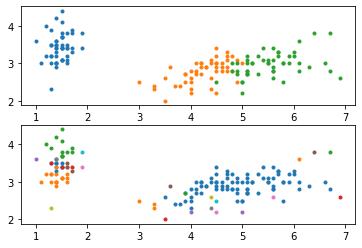

In [519]:
fig,ax=plt.subplots(2)
for g in gl :
  ax[1].plot(x[g,2],x[g,1],'.')

ind=[list(range(50)),list(range(50,100)),list(range(100,150))]
for i in ind:
  ax[0].plot(x[i,2],x[i,1],'.')